#  Import all Relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random 
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source
from IPython.display import SVG
import os

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Haris Rehman/AppData/Local/Programs/Python/Python310/Lib/site-packages'

sns.set()

# Explore the data set

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### (1) ID: 
Each person has a unique ID which serves as a primary key

### (2) Gender:
Male or Female or other

### (3) Age: 
Given in float values

### (4) Hypertension:
A phenomena where your blood pressure is higher than it should be. 1 if patient has it and 0 if it doesn't

### (5) Heart Disease:
1 if patient has it and 0 if it doesn't

### (6) Ever Married:
If patient is married or not

### (7) Work Type:
Private, self-employed or other.

### (8) Residence area:
Urban or rural residence

### (9) Glucose Level:
A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

### (10) BMI Level:
Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres. If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

### (11) Smoking status:
Smoker or non smoker

### (12) Stroke:
Occured or not. 1 for yes and 0 for no

You can look into more detail about these parameters by clicking [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Drop the null values in the BMI column
data.dropna(axis = 0, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [5]:
data.describe(include= 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [6]:
# Since we don't need the ID column and it does not impact our model, we will drop it

data.drop(columns= ['id'], axis =1 , inplace= True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Dividing data set into independent and dependent variables (Features and Targets)

In [7]:
depend_Y = data['stroke']
depend_Y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [8]:
indep_temp = data.drop(columns=['stroke'], axis = 1)
indep_temp.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [9]:
indep = pd.get_dummies(indep_temp,drop_first= True)
indep.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,1,0,0


# Dividing Data set into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(indep, depend_Y, test_size=0.2, random_state=3)
print("The training set has {} rows.".format(X_train.shape[0]))
print("The testing set has {} rows.".format(X_test.shape[0]))

The training set has 3927 rows.
The testing set has 982 rows.


# Implementing the decision tree

In [11]:
stroketree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
stroketree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
stroketree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Visualizing the tree

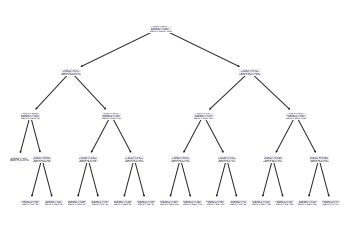

In [13]:
tree.plot_tree(stroketree)
plt.show()

In [14]:
# A better clearer way is to use:
''''export_graphviz(
            tree,
            out_file =  "myTreeName.dot",
            feature_names = list(indep.columns),
            class_names = data.columns,
            filled = True,
            rounded = True
) '''''

graph = Source( tree.export_graphviz(stroketree, out_file=None, feature_names=indep.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Testing with test data set

In [15]:
predTree = stroketree.predict(X_test)

In [16]:
print (predTree[0:5])
print (y_test [0:5])

[0 0 0 0 0]
3090    0
2613    0
5079    0
4530    0
4203    0
Name: stroke, dtype: int64


In [17]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9592668024439919


# Testing for a new customer!

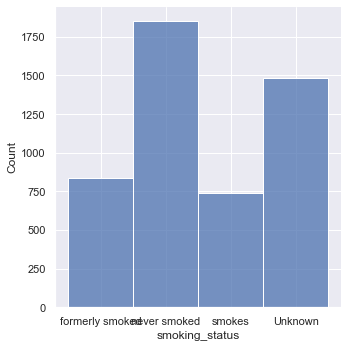

In [20]:
sns.displot(data['smoking_status'])

In [44]:
gender = input("Enter your gender: ").lower()
while (gender!= "male" and gender!= "female" and gender != "other"):
    gender = input("Enter your gender again: ").lower()
    

age = float(input("Enter your age: "))
while (age<=0):
    age = float(input("Enter your age again: "))


hypertension = int(input("Does the patient have hypertension? Enter 1 for Yes and 0 for NO: "))
while (hypertension!= 1 and hypertension!= 0):
    hypertension = int(input("Does the patient have hypertension? Enter 1 for Yes and 0 for NO again: "))


heartdisease = int(input("Does the patient have heartdisease? Enter 1 for Yes and 0 for NO: "))
while (heartdisease!= 1 and heartdisease!= 0):
    hypertension = int(input("Does the patient have heartdisease? Enter 1 for Yes and 0 for NO again: "))


marry_status = input("Is the patient married? Enter Yes or No: ").lower()
while (marry_status!= "yes" and marry_status!= "no"):
    marry_status = input("Is the patient married? Enter Yes or No again: ").lower()


work_type = input("Where does the patient work? Private, self-employed or other: ")


resid = input("Where does the patient live? Rural or residential area: ").lower()
while (resid!= "rural" and resid!= "urban"):
    resid = input("Where does the patient live? Rural or residential area. Try again: ").lower()


glucose = float(input("What is patient's average glucose level: "))
while (glucose<= 20 or glucose >= 500):
    glucose = float(input("What is patient's average glucose level. Try again: "))


bmi = float(input("What is patient's average bmi level: "))
while (bmi<=0):
    bmi = float(input("What is patient's average bmi level. Try again: "))


smoking_status = input("Does the patient smoke? Enter Unknown, Smokes. Formerly Smoked or never smoked: ").lower()
while (smoking_status!= "unknown" and smoking_status!= "smokes" and smoking_status != "never smoked" and smoking_status != "formerly smoked"):
    smoking_status = input("Does the patient smoke? Enter Unknown, Smokes. Formerly Smoked or never smoked. Try again: ").lower()


temp = {'gender':[gender], 'age': [age], 'hypertension': [hypertension], 'heart_disease': [heartdisease],'ever_married': [marry_status], 'work_type': [work_type], 'Residence_type': [resid], 'avg_glucose_level': [glucose], 'bmi': [bmi], 'smoking_status': [smoking_status]}
testdf = pd.DataFrame(temp)
testdffinal = indep_temp.append(testdf)
test_df = pd.get_dummies(indep_temp, drop_first= True)

guess = stroketree.predict(test_df.iloc[-1].values.reshape(1,-1))

if (guess[0] == 1):
    print("THE PATIENT CAN SUFFER FROM STROKE")
else:
    print("The patient is safe.")

The patient is safe.


C:\Users\Haris Rehman\AppData\Local\Temp\ipykernel_128524\1429063452.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testdffinal = indep_temp.append(testdf)
d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
test_df.iloc[-1].values.reshape(1,-1)
guess = stroketree.predict(test_df.iloc[-1].values.reshape(1,-1))
print(guess)


[0]


d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
